In [1]:
%matplotlib inline

import numpy as np
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8, 8)

import matplotlib.colors as colors

import math

import json

In [2]:
JSON_FILE = "../xps/2017_09_07_sapcta_run10_optim_bruteforce_res0.5_lst_prod3b_north/optimize_sigma.json"

with open(JSON_FILE, "r") as fd:
    data = json.load(fd)

In [3]:
scores = np.array(data['scores'])
solutions = np.array(data['solutions'])

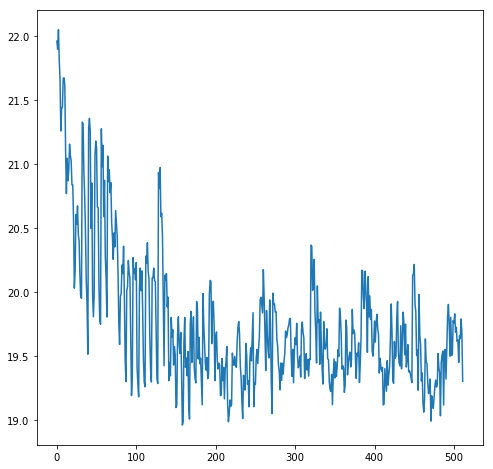

In [4]:
plt.plot(scores.ravel(), )

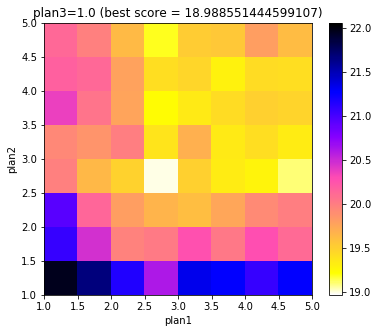

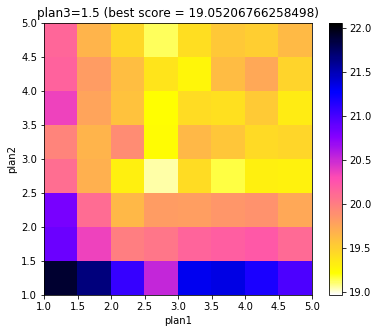

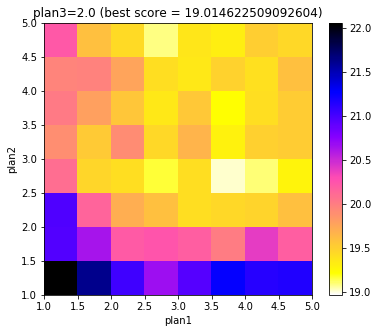

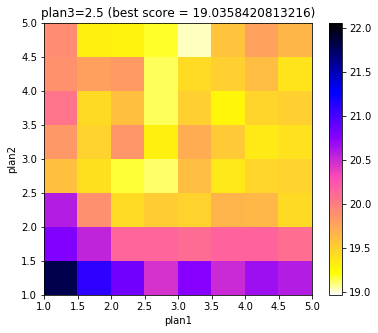

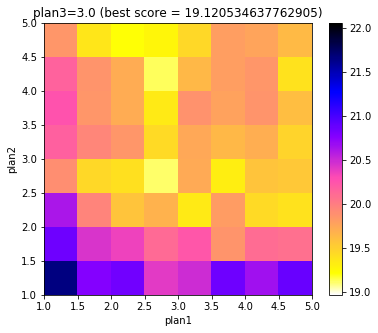

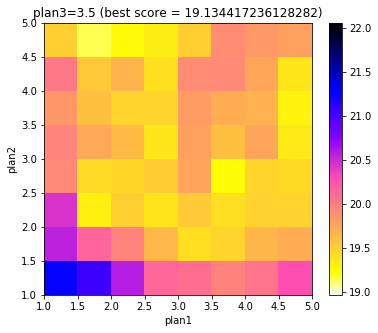

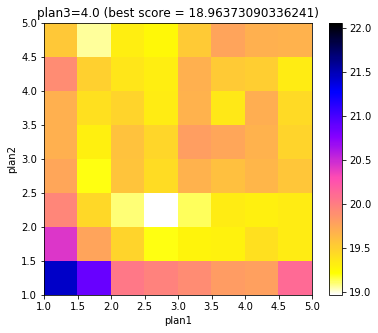

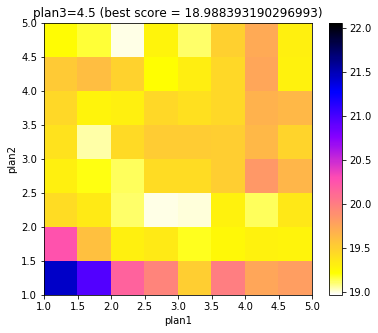

In [5]:
min_value = scores.min()
max_value = scores.max()

for p3i in range(scores.shape[0]):
    fig, ax = plt.subplots(figsize=(6, 5))

    #xx = solutions[0,:,:,p3i,0]
    #yy = solutions[1,:,:,p3i,0]
    x = solutions[0,:,0,p3i,0]
    x = np.concatenate([x, np.array([x[-1] + x[-1] - x[-2]])])
    y = solutions[1,0,:,p3i,0]
    y = np.concatenate([y, np.array([y[-1] + y[-1] - y[-2]])])
    #xx, yy = np.meshgrid(np.arange(1., 5.5, 0.5), np.arange(1., 5.5, 0.5))   # workaround to avoid pcolormesh ignoring the last row and collumn...
    xx, yy = np.meshgrid(x, y)   # workaround to avoid pcolormesh ignoring the last row and collumn...

    zz = scores[:,:,p3i,0]

    im = ax.pcolormesh(xx, yy, zz,
                       vmin=min_value,
                       vmax=max_value,
                       #norm=colors.LogNorm(),
                       cmap='gnuplot2_r')

    plt.colorbar(im, ax=ax)
    
    ax.set_xlabel("plan1")
    ax.set_ylabel("plan2")
    ax.set_title("plan3={} (best score = {})".format(solutions[2,0,0,p3i,0], zz.min()))